<a href="https://colab.research.google.com/github/term1830/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-03-17 23:46:03--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.36.230
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.36.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  72.8MB/s    in 2.7s    

2020-03-17 23:46:06 (72.8 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [0]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [0]:
import numpy as np
import pandas as pd

# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
#checking orders to see if products are mentioned

orders_source = '/content/instacart_2017_05_01/orders.csv'

orders_df = pd.read_csv(orders_source)
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
#checking aisles for useful information
aisles_source = '/content/instacart_2017_05_01/aisles.csv'
aisles_df = pd.read_csv(aisles_source)
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [0]:
#checking departments for information
departments_source = '/content/instacart_2017_05_01/departments.csv'
dept_df = pd.read_csv(departments_source)
dept_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [0]:
#putting products into dataframe

products_source = '/content/instacart_2017_05_01/products.csv'

products_df = pd.read_csv(products_source)

products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [0]:
#finding the products/product ids of the products and putting them into a new dataframe 

products_df_2 = products_df[(products_df['product_name'] == 'Banana') | (products_df['product_name'] == 'Limes') | 
(products_df['product_name'] == 'Strawberries') | (products_df['product_name'] == 'Organic Whole Milk')| 
(products_df['product_name'] == 'Large Lemon')
| (products_df['product_name'] == 'Organic Avocado')| (products_df['product_name'] == 'Organic Hass Avocado') | 
(products_df['product_name'] == 'Organic Baby Spinach') | (products_df['product_name'] == 'Organic Strawberries') 
| (products_df['product_name'] == 'Bag of Organic Bananas')]
products_df_2


,product_id,product_name,aisle_id,department_id
13175,13176,Bag of Organic Bananas,24,4
16796,16797,Strawberries,24,4
21136,21137,Organic Strawberries,24,4
21902,21903,Organic Baby Spinach,123,4
24851,24852,Banana,24,4
26208,26209,Limes,24,4
27844,27845,Organic Whole Milk,84,16
47208,47209,Organic Hass Avocado,24,4
47625,47626,Large Lemon,24,4
47765,47766,Organic Avocado,24,4


In [0]:
#was just trying to limit amount of rows needed
products_df_3 = products_df_2[['product_id','product_name']]
products_df_3

,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes
27844,27845,Organic Whole Milk
47208,47209,Organic Hass Avocado
47625,47626,Large Lemon
47765,47766,Organic Avocado


In [0]:
opp_source = '/content/instacart_2017_05_01/order_products__prior.csv'

opp_df = pd.read_csv(opp_source)
print (opp_df.shape)
opp_df.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [0]:
opt_source = '/content/instacart_2017_05_01/order_products__train.csv'

opt_df = pd.read_csv(opt_source)
print (opt_df.shape)
opt_df.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [0]:
merge1 = pd.merge(products_df,opp_df,on='product_id',how='outer')
merge1.head(5)

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,1107.0,7.0,0.0
1,1,Chocolate Sandwich Cookies,61,19,5319.0,3.0,1.0
2,1,Chocolate Sandwich Cookies,61,19,7540.0,4.0,1.0
3,1,Chocolate Sandwich Cookies,61,19,9228.0,2.0,0.0
4,1,Chocolate Sandwich Cookies,61,19,9273.0,30.0,0.0


In [0]:
merge2 = merge1.groupby(['product_name']).agg({'add_to_cart_order': 'sum'})
merge2.head()

,add_to_cart_order
product_name,
#2 Coffee Filters,7193.0
#2 Cone White Coffee Filters,96.0
#2 Mechanical Pencils,62.0
#4 Natural Brown Coffee Filters,2579.0
& Go! Hazelnut Spread + Pretzel Sticks,1895.0


In [0]:
#top ordered products listed

merge3 = merge2.sort_values('add_to_cart_order',ascending = False).head(9)
merge3

,add_to_cart_order
product_name,
Banana,2312794.0
Bag of Organic Bananas,1933657.0
Organic Strawberries,1918661.0
Organic Baby Spinach,1797386.0
Organic Hass Avocado,1447034.0
Large Lemon,1213412.0
Limes,1206836.0
Organic Avocado,1139505.0
Strawberries,1017253.0


## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
table2.columns.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [0]:
table2.index.tolist()

['treatmenta', 'treatmentb']

In [0]:
table3 = table2.reset_index(drop=False)
table3

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [0]:
# table2 -> tidy
tidy1 = table3.melt(id_vars = 'index', value_vars = ['John Smith','Jane Doe','Mary Johnson'])
tidy1

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [0]:
# tidy -> table2

wide_1= tidy1.pivot_table(index = 'variable', columns = 'index',values = 'value')
wide_1

index,treatmenta,treatmentb
variable,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [0]:
import seaborn as sns

flights = sns.load_dataset('flights')

In [0]:
# Flights Pivot Table
flights1 = flights.pivot_table (index = 'year',columns = 'month')
flights1

passengers                       ...                                    
month    January February March April  ... September October November December
year                                   ...                                    
1949         112      118   132   129  ...       136     119      104      118
1950         115      126   141   135  ...       158     133      114      140
1951         145      150   178   163  ...       184     162      146      166
1952         171      180   193   181  ...       209     191      172      194
1953         196      196   236   235  ...       237     211      180      201
1954         204      188   235   227  ...       259     229      203      229
1955         242      233   267   269  ...       312     274      237      278
1956         284      277   317   313  ...       355     306      271      306
1957         315      301   356   348  ...       404     347      305      336
1958         340      318   362   348  ...       404     359      310      337
1959         360      342   406   396  ...       463     407      362      405
1960         417      391   419   461  ...       508     461      390      432

[12 rows x 12 columns]

In [0]:
#copying code from the lecture is below here

import matplotlib.pyplot as plt

In [0]:
#create df1
df1 = pd.DataFrame ([['a',1], ['b',2]], columns = ['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [0]:
#create df2
df2 = pd.DataFrame ([['c',3],['d',4]], columns = ['letter','number'])
df2

,letter,number
0,c,3
1,d,4


In [0]:
#concating the dataframes

df3 = pd.concat ([df1,df2],axis=0)
df3.reset_index(drop=True,inplace = True)
df3

,letter,number
0,a,1
1,b,2
2,c,3
3,d,4


In [0]:
#concat with axis = 1
df4 = pd.concat([df1,df2],axis = 1)
df4

,letter,number,letter,number
0,a,1,c,3
1,b,2,d,4


In [0]:
#merge stocks
stock_names = {'Symbol': ['AMZN','MSFT','FB','AAPL','GOOGL'], 'Name':['Amazon','Microsoft','Facebook','Apple','Google']}
stock_names

{'Name': ['Amazon', 'Microsoft', 'Facebook', 'Apple', 'Google'],
 'Symbol': ['AMZN', 'MSFT', 'FB', 'AAPL', 'GOOGL']}

In [0]:
#stock_prices
stock_prices = {'Symbol': ['AAPL','MSFT','GOOGL','FB','AMZN'],'OpenPrice':[217.51,96.54,501.3,51.45,1703.34]}
stock_prices

{'OpenPrice': [217.51, 96.54, 501.3, 51.45, 1703.34],
 'Symbol': ['AAPL', 'MSFT', 'GOOGL', 'FB', 'AMZN']}

In [0]:
#convert to pandas DF
stockprice_df=pd.DataFrame(stock_prices)
stockprice_df

,Symbol,OpenPrice
0,AAPL,217.51
1,MSFT,96.54
2,GOOGL,501.30
3,FB,51.45
4,AMZN,1703.34


In [0]:
#convert to DF
stockname_df = pd.DataFrame(stock_names)
stockname_df

,Symbol,Name
0,AMZN,Amazon
1,MSFT,Microsoft
2,FB,Facebook
3,AAPL,Apple
4,GOOGL,Google


In [0]:
#merge these dataframes
named_stocks_df=pd.merge(stockname_df,stockprice_df)
named_stocks_df

,Symbol,Name,OpenPrice
0,AMZN,Amazon,1703.34
1,MSFT,Microsoft,96.54
2,FB,Facebook,51.45
3,AAPL,Apple,217.51
4,GOOGL,Google,501.30


In [0]:
week_high = {'Symbol': ['FB','AMZN','AAPL','MSFT','NFLX'],'52wkHigh':[60.79,2050.49,233.47,110.11,303.22]}
week_high

{'52wkHigh': [60.79, 2050.49, 233.47, 110.11, 303.22],
 'Symbol': ['FB', 'AMZN', 'AAPL', 'MSFT', 'NFLX']}

In [0]:
wkhigh_df=pd.DataFrame(week_high)
wkhigh_df

,Symbol,52wkHigh
0,FB,60.79
1,AMZN,2050.49
2,AAPL,233.47
3,MSFT,110.11
4,NFLX,303.22


In [0]:
full_stocks_df = pd.merge(named_stocks_df,wkhigh_df,on='Symbol',how='outer')
full_stocks_df

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47
4,GOOGL,Google,501.30,NaN
5,NFLX,NaN,NaN,303.22


In [0]:
full_stocks_df=pd.merge(named_stocks_df,wkhigh_df,on='Symbol',how='right')
full_stocks_df

,Symbol,Name,OpenPrice,52wkHigh
0,AMZN,Amazon,1703.34,2050.49
1,MSFT,Microsoft,96.54,110.11
2,FB,Facebook,51.45,60.79
3,AAPL,Apple,217.51,233.47
4,NFLX,NaN,NaN,303.22


In [0]:
index=['John Smith','Jane Doe','Mary Johnson']
columns=['treatmenta','treatmentb']

In [0]:
table1 =pd.DataFrame(
    [[np.nan,2],
    [16,11],
     [3,1]],
     index=['John Smith','Jane Doe','Mary Johnson'],
     columns=['treatmenta','treatmentb'])
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [0]:
table2=table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [0]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [0]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [0]:
table_one=table1.reset_index(drop=False)
table_one

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [0]:
tidy1 = table_one.melt(id_vars='index',value_vars=['treatmenta','treatmentb'])
tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
tidy1 = tidy1.rename(columns=
        {'index':'name',
         'variable':'treatment',
         'value':'result'})
tidy1

,name,treatment,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
tidy1['treatment']=tidy1['treatment'].str.replace('treatment','')
tidy1

,name,treatment,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [0]:
table_two = table2.T

In [0]:
tidy2=table_two.reset_index().melt(id_vars='index').rename(columns={
    'index':'name',
    'variable':'trt',
    'value':'result'})
tidy2

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [0]:
tidy1

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


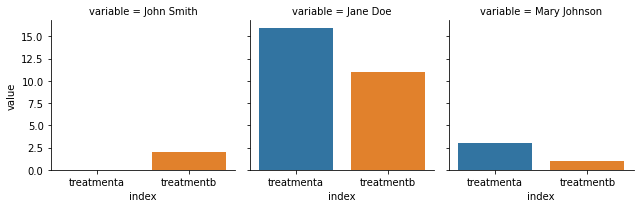

In [0]:
sns.catplot(x='index',
            y='value',
            col='variable',
            kind='bar',
            data=tidy1,
            height=3);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####